# This is the first Kaggle competition Li Kobe Kobe joins#

# 1. Configure the libraries and import the data#

In [1]:
import numpy as np
import pandas as pd

In [15]:
train_df = pd.read_csv('./input/train.csv', index_col = 0)
test_df = pd.read_csv('./input/test.csv', index_col = 0)
#We don't need pandas' default column index

### Check the data###

In [17]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
train_df.shape

(1460, 80)

In [19]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [20]:
test_df.shape

(1459, 79)

The training set and the test set have almost the same amount of data entries, while the test set doesn't have the "SalePrice" column which we need to predict.

# 2. Data processing (Result)#

### First, let's check the distribution of "SalePrice" in the training set.###

In [24]:
%matplotlib inline
prices = train_df['SalePrice']

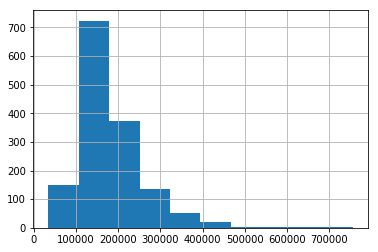

In [25]:
prices.hist()

We notice that the data is not normal distributed, so we use log1p to make it normal.

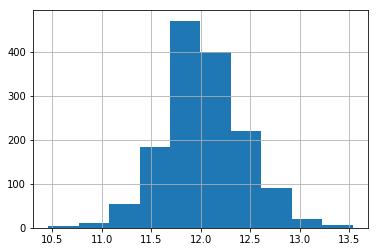

In [27]:
np.log1p(train_df['SalePrice']).hist()

This is normalized, we are going to use it as the result of trianing set.

In [31]:
y_train = np.log1p(train_df.pop('SalePrice'))

We will process the features (other columns) as well. In order to make the features in training set and test set uniform, we will combine them to process together.

In [49]:
all_df = pd.concat((train_df,test_df),axis=0)

In [56]:
all_df.shape

(2919, 79)

In [51]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

Everthing looks good

# 3. Data Processing (Feature Engineering)#

Based on the description on Kaggle, 'MSSubClass' is actually a category instead of a numeric value.

In [52]:
all_df['MSSubClass'].dtypes

dtype('int64')

So we need to convert these values into string.

In [53]:
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

In [54]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

There are other features that are logistic values, we would like to convert them into binary format.

In [58]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [95]:
all_dummy_df.shape

(2919, 303)

Then, let's check the missing values.

In [64]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(12)

LotFrontage          486
GarageYrBlt          159
MasVnrArea            23
BsmtHalfBath           2
BsmtFullBath           2
BsmtFinSF2             1
GarageCars             1
TotalBsmtSF            1
BsmtUnfSF              1
GarageArea             1
BsmtFinSF1             1
Condition1_Artery      0
dtype: int64

We see the column of "LotFrontage" has the most missing values, and we are going to fill them with average values.

In [65]:
all_dummy_df = all_dummy_df.fillna(all_dummy_df.mean())

In [69]:
all_dummy_df.isnull().sum().sum()

0

Then, we pick those columns that are not binary values (numeric values), to normalize them.

In [98]:
filter1 = all_dummy_df.dtypes == 'int64'
filter2 = all_dummy_df.dtypes == 'float64'
numeric_col = all_dummy_df.columns[filter1 | filter2]
numeric_col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [105]:
numeric_col_mean = all_dummy_df.loc[:,numeric_col].mean()
numeric_col_std = all_dummy_df.loc[:,numeric_col].std()
all_dummy_df.loc[:,numeric_col] = (all_dummy_df.loc[:,numeric_col] - numeric_col_mean)/ numeric_col_std

In [106]:
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.29308,-0.934702,...,0,0,0,1,0,0,0,0,1,0
2,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.29308,-0.629788,...,0,0,0,1,0,0,0,0,1,0
3,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.29308,-0.288467,...,0,0,0,1,0,0,0,0,1,0
4,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,-0.047266,...,0,0,0,1,1,0,0,0,0,0
5,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.29308,-0.161040,...,0,0,0,1,0,0,0,0,1,0


The data processing has finished.

# 4. Build the Model #

In [111]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [112]:
dummy_train_df.shape,dummy_test_df.shape

((1460, 303), (1459, 303))

In [118]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

## 4.1 Ridge Regression##

In [127]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [138]:
alphas = np.logspace(-3,2,50)#from 0.001 to 100 to evenly sample 50 values
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5,1,'Alphas VS CV Error')

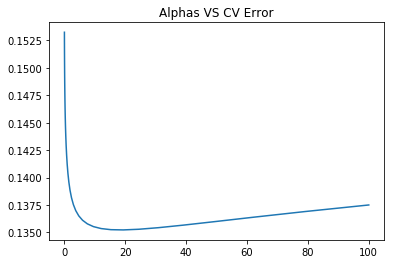

In [140]:
%matplotlib inline
plt.plot(alphas,test_scores)
plt.title('Alphas VS CV Error')

In [141]:
min(test_scores)

0.1352271323618692

Using Ridge, the minum score can be around 0.135, while alpha is about 15.

## 4.2 Random Forest##

In [144]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\Kobe Lee\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [148]:
max_features = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
test_scores = []
for max_feature in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feature)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

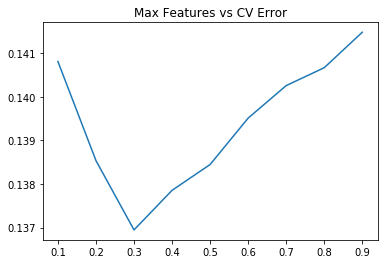

In [149]:
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

In [150]:
min(test_scores)

0.13694757208295044

Using Random Forest, the minum score can be around 0.137, while max feature is 3.

## 4.3 Ensemble##

We merge the 2 models with their best settings to generate the final model.

In [154]:
ridge = Ridge(alpha = 15)
rf = RandomForestRegressor(n_estimators = 500, max_features = .3)

In [157]:
ridge.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Then, we do the final predition, and change back the results to the right distribution. Finnally, we use the 2 presictions' mean as our result.

In [158]:
y_ridge = np.expm1(ridge.predict(X_test))
y_rf = np.expm1(rf.predict(X_test))

In [159]:
y_final = (y_ridge + y_rf)/2

In [164]:
submission_df = pd.DataFrame({'Id':test_df.index,'SalePrice':y_final})
submission_df.head()

,Id,SalePrice
0,1461,119439.952064
1,1462,151678.197032
2,1463,174937.700671
3,1464,190237.979007
4,1465,195374.263377


In [165]:
submission_df.shape

(1459, 2)

The result looks good. And we export it then submit it.

In [168]:
submission_df.to_csv('submission.csv',index = False)